In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import seaborn as sns
import pickle #save encoder
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.utils import to_categorical


In [24]:

#read data
df = pd.read_csv('./work/viikko11/datasets/iris.csv')

# Divide X and y
X = df.iloc[:, 0:4]
y = df.iloc[:, [4]]
y = to_categorical(y)


In [25]:

# Train and test data 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# Scale X
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)


In [26]:
# Build and train ANN
model = Sequential()
model.add(Dense(50, input_dim=X.shape[1], kernel_initializer='he_uniform', activation='relu')) # 4 size input layer, 50 size first hidden layer
model.add(Dense(25, activation='relu')) # 25 size second hidden layer
model.add(Dense(3, activation='softmax')) # 3 size output layer
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=32,  verbose=1, validation_data=(X_test,y_test))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                250       
                                                                 
 dense_13 (Dense)            (None, 25)                1275      
                                                                 
 dense_14 (Dense)            (None, 3)                 78        
                                                                 
Total params: 1603 (6.26 KB)


Trainable params: 1603 (6.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
4/4 [==============================] - 2s 126ms/step - loss: 1.8087 - accuracy: 0.1750 - val_loss: 1.6187 - val_accuracy: 0.3000
Epoch 2/100
4/4 [==============================] - 0s 24ms/step - loss: 1.5324 - accuracy: 0.2250 - val_loss: 1.4183 - val_accuracy: 0.3000
Epoch 3/100
4/4 [==============================] - 0s 26ms/step - loss: 1.2800 - accuracy: 0.3750 - val_loss: 1.2448 - val_accuracy: 0.3333
Epoch 4/100
4/4 [==============================] - 0s 20ms/step - loss: 1.0639 - accuracy: 0.4667 - val_loss: 1.0972 - val_accuracy: 0.2667
Epoch 5/100
4/4 [==============================] - 0s 22ms/step - loss: 0.8953 - accuracy: 0.4833 - val_loss: 0.9689 - val_accuracy: 0.3000
Epoch 6/100
4/4 [==============================] - 0s 22ms/step - loss: 0.7532 - accuracy: 0.6917 - val_loss: 0.8602 - val_accuracy: 0.6000
Epoch 7/100
4/4 [=======

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


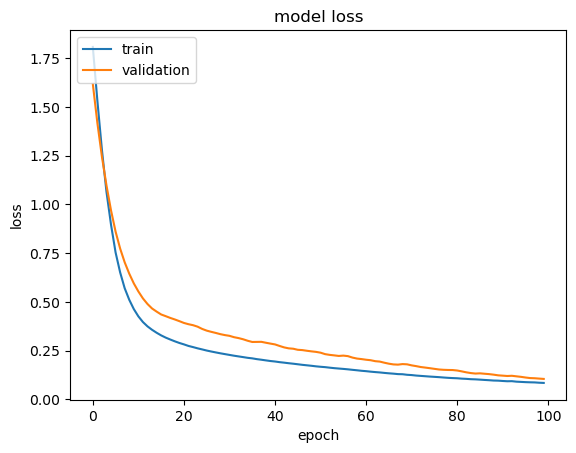

1/1 [==============================] - 0s 58ms/step - loss: 0.1042 - accuracy: 1.0000

Test results - Loss: 0.10421498864889145 - Accuracy: 100.0%


In [27]:
# visualize training
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'\nTest results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')


In [28]:
# Predict with test data
y_pred_proba = model.predict(X_test)
y_pred = y_pred_proba.argmax(axis=1)
y_test = y_test.argmax(axis=1)


1/1 [==============================] - 0s 159ms/step


[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


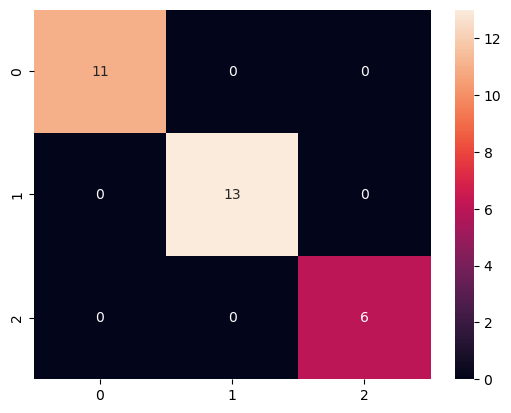

In [29]:
# Confusion Matrix and metrics
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True, fmt='g')
plt.show()